<a href="https://colab.research.google.com/github/danny797/Prueba/blob/main/04_std_Notes_Pandas_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **04. Pandas Introduction to temporal series!** </center>



## **Outline**
1. **Pandas  temporal series**
2. **Working with synchronized data from different sources**
3. **More about Plotting with pandas**




In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "DA-20231-Laconga" #@param {type:"string"}
assignment_id = group_id +'.pandas_introduction'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "DataAnalisisDaniel/la-conga-da-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/DataAnalisisDaniel/la-conga-da-student


In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.0.3'

#**1. Time series with an example**

Now, we are use a more specific dataset to see the pandas funtionalities in time. To see much better this kind of functionalities we will use a new dataset.

Vamos a usar la recolección de un indice climático **AO (Oscilación Ártica)**, used to describe the states and climate changes.

* Positive **AO+** when pressure differences is high,  the western winds from the Atlantic are intense over Europe and run through high latitudes, providing mild winters (inviernos templados) to the continent

* Negative **AO-** when pressure differences is low, winters very cool...like in game of thrones!


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/aonao.png" style="width:500px;">

We will convert in a pandas serie structure with monthly frequency


In [ ]:
#@title **code**: Read temporal serie data
ao = np.loadtxt('https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/data/monthly_ao.txt')
print(ao.shape)
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates

(823, 3)


DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='M')

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: M, dtype: float64


<Axes: >

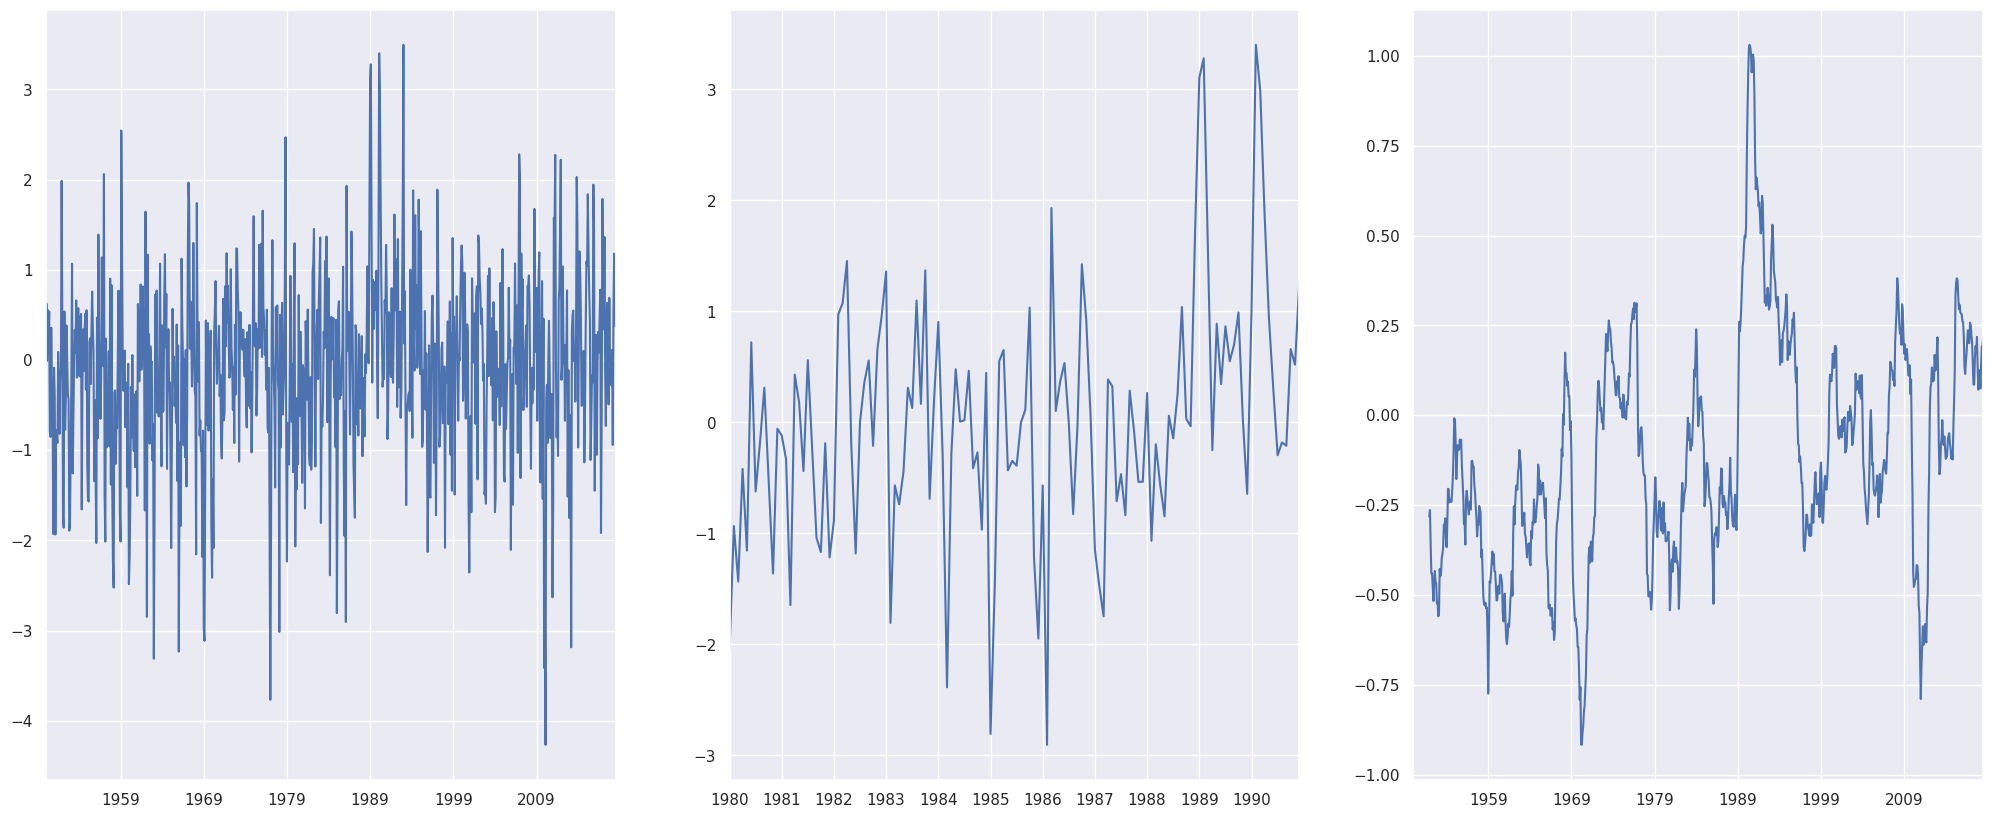

In [ ]:
#@title **code** visualize series
AO = pd.Series(ao[:,2], index=dates)
print(AO.head())
plt.figure(figsize = (25, 10))
ax= plt.subplot(1,3,1)
AO.plot();
ax= plt.subplot(1,3,2)
AO['1980':'1990'].plot()
ax= plt.subplot(1,3,3)
AO.rolling(24).mean().plot()

In [ ]:
#@title **code** Preprocessing: SELECTING BY YEAR
AO['1960']

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

<Axes: >

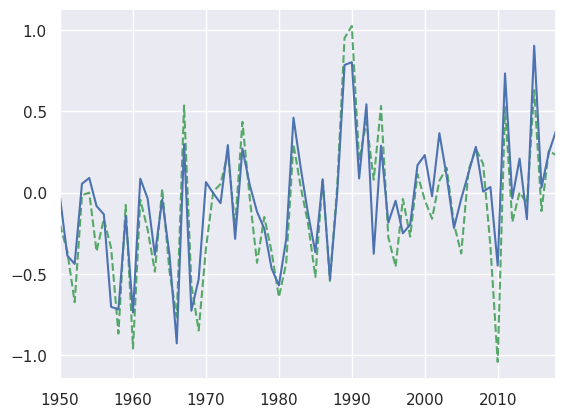

In [ ]:
#@title **code**
#@markdown Pandas provide easy way to resample data to different time frequency
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')
AO_mm = AO.resample("A").median()
AO_mm.plot()

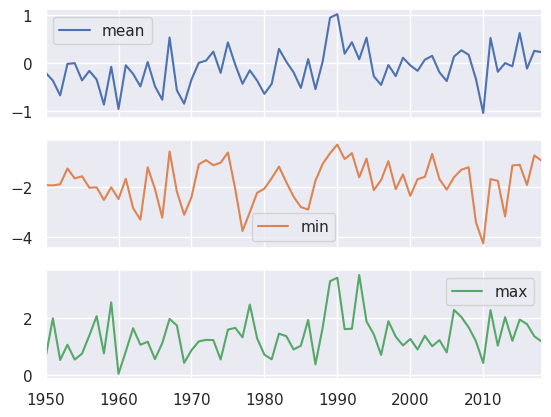

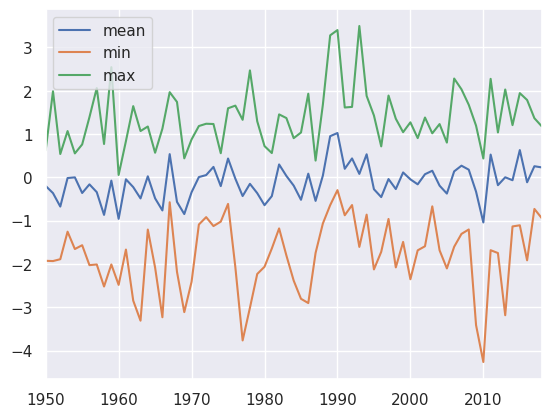

In [ ]:
#@title **code**
#@markdown Resample with other operation, for instance min and max.
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True);
AO_mm['1900':'2020'].plot();

1950-01-31 00:00:00   -0.06031
1950-01-31 12:00:00   -0.06031
1950-02-01 00:00:00   -0.06031
1950-02-01 12:00:00   -0.06031
1950-02-02 00:00:00   -0.06031
Freq: 12H, dtype: float64
(50037,)
1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: M, dtype: float64
(823,)


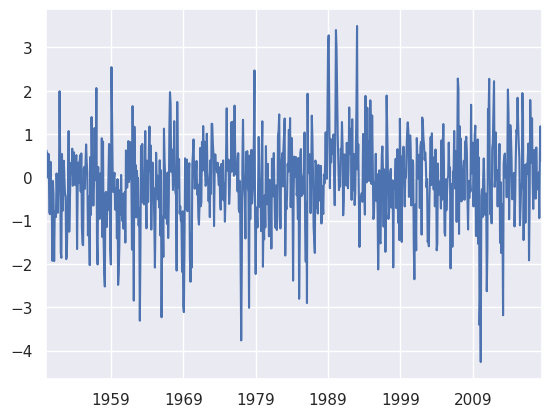

In [ ]:
#@title **code: oversampling**
AO_res =AO.resample(pd.Timedelta("12h")).fillna(method="pad")
print(AO_res.head())
print(AO_res.shape)
AO.plot()
print(AO.head())
print(AO.shape)

# 2.  **Working with synchronized data from different sources**


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/aonao.png" style="width:500px;">

- Now, we will load data about other sensor: **The AO information**

In [ ]:
#@title **code** using two series-files in a unique Dataframe
nao = np.loadtxt('https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/data/monthly_anao.txt')

dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')

ao = np.loadtxt('https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/data/monthly_ao.txt')
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

AO = pd.Series(ao[:,2], index=dates)
NAO = pd.Series(nao[:,2], index=dates_nao)
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='M')

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


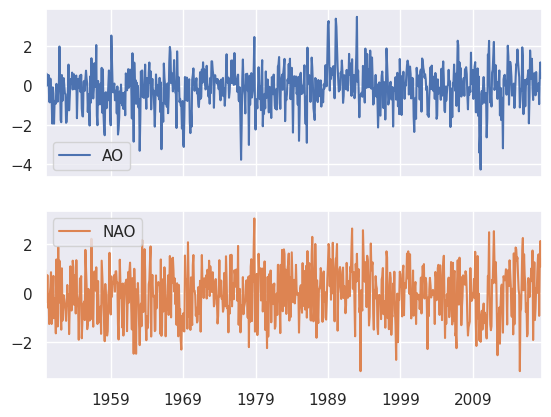

In [ ]:
#@title **code**
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})
aonao.plot(subplots=True)

aonao.head()

In [ ]:
#@title **code** We can simply add column to the Data Frame:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


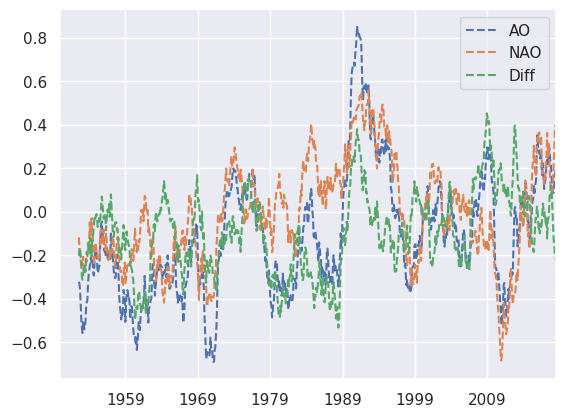

In [ ]:
#@title **code** Rolling mean:
aonao.rolling(window=32, center=False).mean().plot(style='--')
del aonao['Diff']

In [ ]:
#@title **code:** correlating variables but temporally!!
aonao.AO.rolling(window=120).corr(other=aonao.NAO)#.plot(style='-r')
aonao.corr()

1950-01-31         NaN
1950-02-28         NaN
1950-03-31         NaN
1950-04-30         NaN
1950-05-31         NaN
                ...   
2018-03-31    0.624147
2018-04-30    0.624631
2018-05-31    0.624976
2018-06-30    0.627930
2018-07-31    0.628622
Freq: M, Length: 823, dtype: float64

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Make a temporal correlation, with window size of 5 and using series having only values each year (reduced by the median). Return:
 - AO vs AO correlation
 - NAO vs NAO correlation
 - AO vs NAO correlation


In [ ]:
 #@title **code student**
def temporal_correlation_years(aonao):
  #Import libraries
  import pandas as pd

  """
  Put your code here
  """

  return

In [ ]:
#@title ## **send your answer**
student_func_str = inspect.getsource(temporal_correlation_years)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


# 3. **More about Plotting with pandas**

In [ ]:
#@title **code** Loading and inspecting
# d =  pd.read_csv("data/california_housing_train.csv")
d = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
type(d)

pandas.core.frame.DataFrame

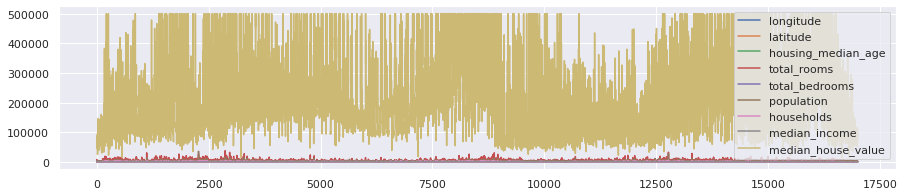

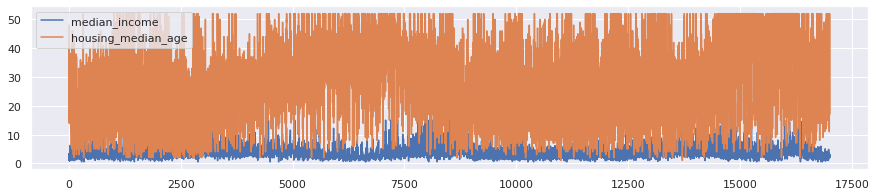

In [ ]:
#@title **code**
d.plot(figsize=(15,3))
attributes = [ "median_income", "housing_median_age"]
d[attributes].plot(figsize=(15,3))
#pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Calculate the median of the **median_income** and the **housing_median_age** the temporal serie
- Plot the result
- How can you relationate this two variables?

In [ ]:
 #@title **code student**





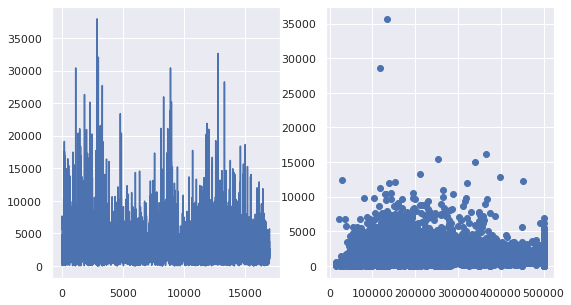

In [ ]:
#@title **code** with matplotlib running seaborn
#@markdown next lecture, we will go deeper to visualization libs
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
plt.subplot(1,2,1)
d.total_rooms.plot()
plt.subplot(1,2,2)
plt.scatter(d.median_house_value, d.population)

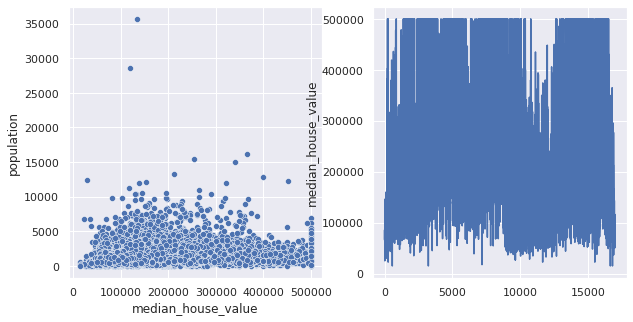

In [ ]:
#@title **code** with seaborn running seaborn
plt.figure(figsize = (10, 5))

ax= plt.subplot(1,2,1)
sns.scatterplot(ax=ax, data=d, x="median_house_value", y="population")
ax= plt.subplot(1,2,2)
sns.lineplot(ax=ax, data=d.median_house_value);

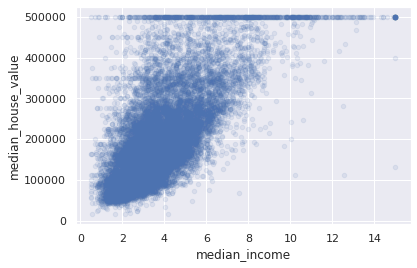

In [ ]:
#@title **code** from matplotlip
d.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

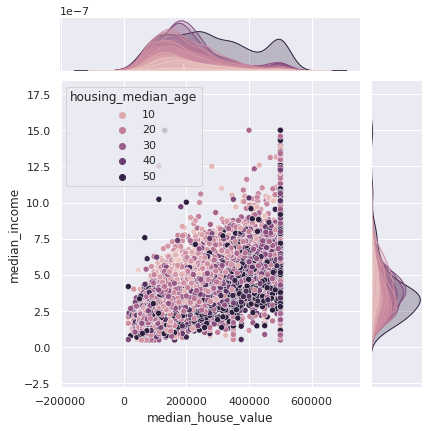

In [ ]:
#@title **code** from seaborn
sns.jointplot(x="median_house_value", y="median_income", data=d, hue ="housing_median_age");

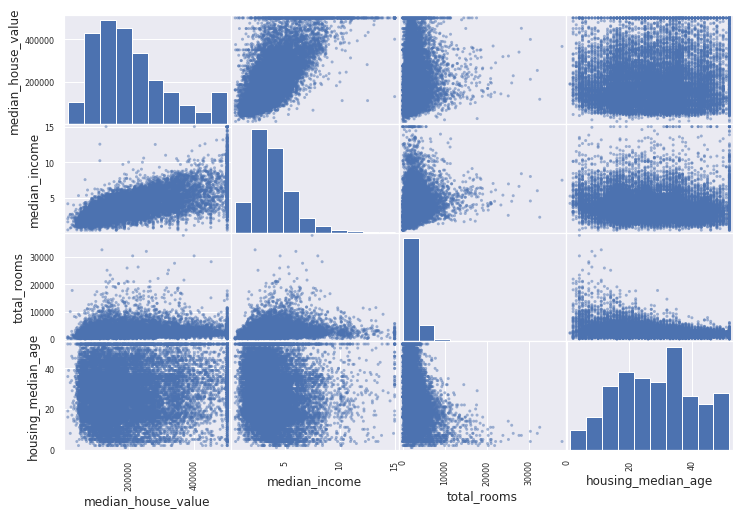

In [ ]:
#@title **code** from matplotlip but with backened seaborn
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8));

#pd.plotting.scatter_matrix(d, figsize=(10,10));

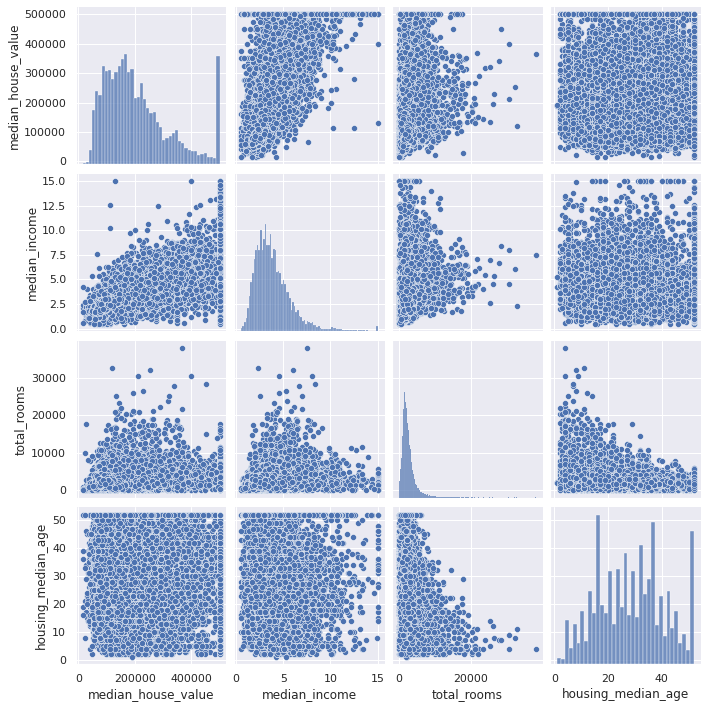

In [ ]:
#@title **code** from seaborn
sns.pairplot(data=d[attributes])

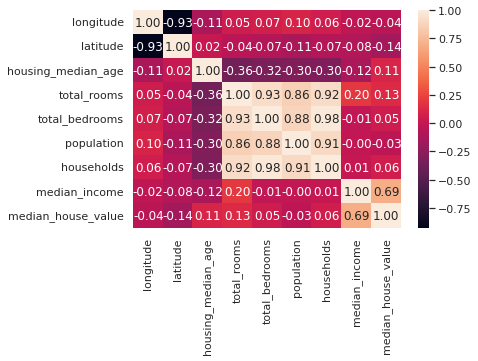

In [ ]:
#@title **code** more compact and quantitative visualization
sns.heatmap(d.corr(), annot=True, fmt=".2f")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


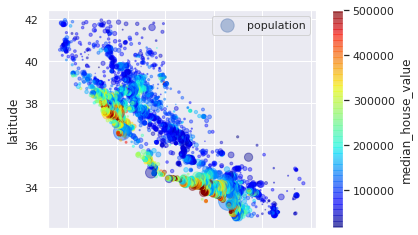

In [ ]:
#@title **code** multidimensional plot
d.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=d["population"]/100,
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
d.head()

## Referencias

[1] official panda doc sites:http://pandas.pydata.org/pandas-docs/stable/index.html

[2] Description of a dataset: https://www.kaggle.com/camnugent/california-housing-prices

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
